In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
ds = pd.read_csv("insurance.csv")

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
ds.shape

(1338, 7)

In [6]:
ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
ds.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Admin\AppData\Local\Temp\ipykernel_5996\746984567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['age'])


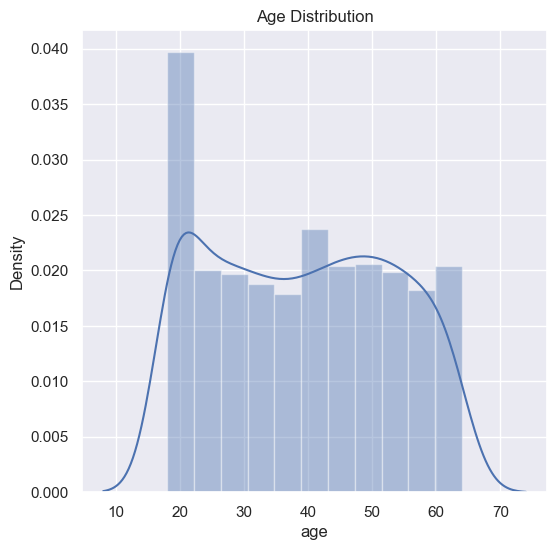

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(ds['age'])
plt.title('Age Distribution')
plt.show()

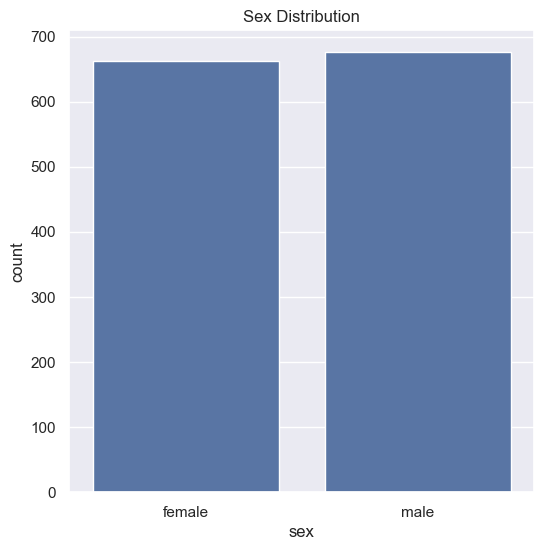

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=ds)
plt.title('Sex Distribution')
plt.show()

In [10]:
ds['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_5996\916599368.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['bmi'])


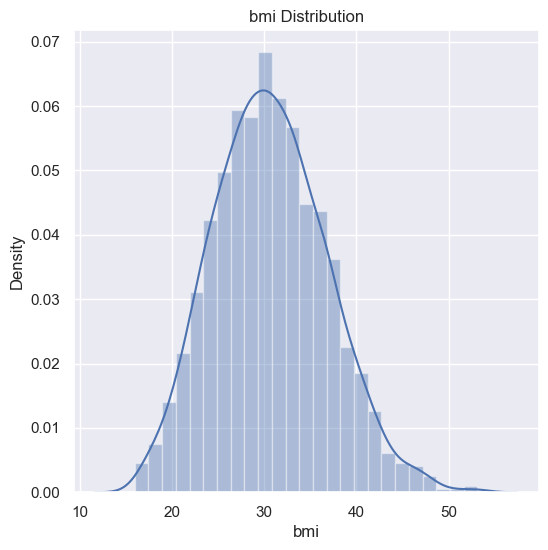

In [11]:
plt.figure(figsize=(6,6))
sns.distplot(ds['bmi'])
plt.title('bmi Distribution')
plt.show()

In [12]:
#Normal BMI Range-> 18.5 to 24.9

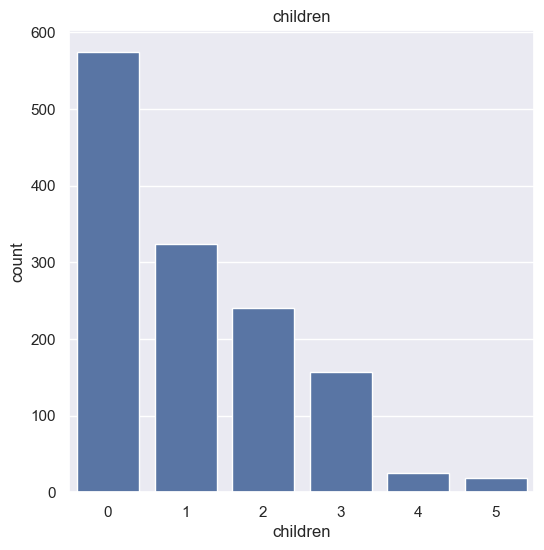

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=ds)
plt.title('children')
plt.show()

In [14]:
ds['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

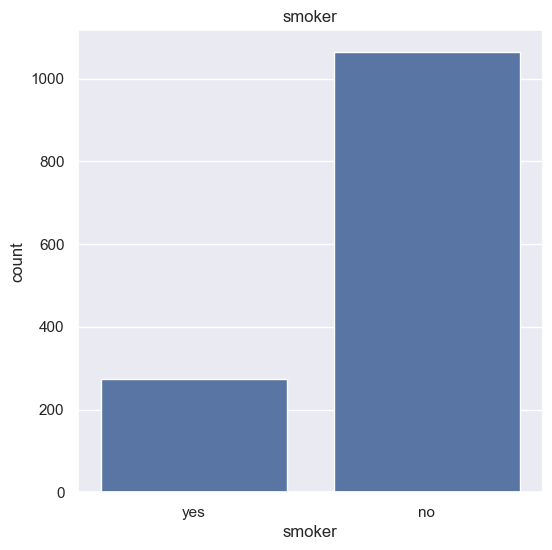

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=ds)
plt.title('smoker')
plt.show()

In [16]:
ds['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

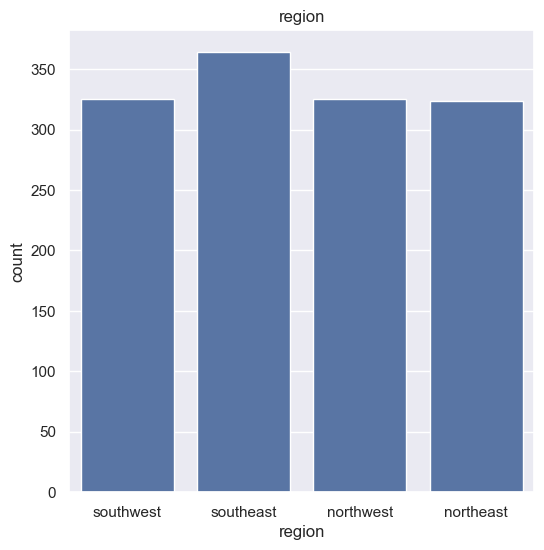

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=ds)
plt.title('region')
plt.show()

In [18]:
ds['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_5996\1737217154.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['charges'])


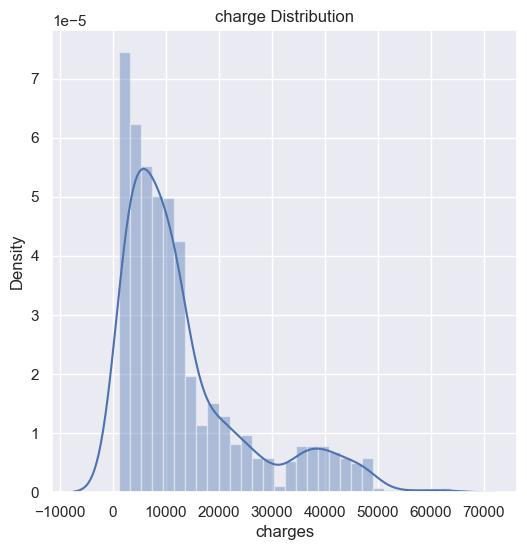

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(ds['charges'])
plt.title('charge Distribution')
plt.show()

In [20]:
# Data pre-processing

In [21]:
ds.replace({'sex':{'male':0,'female':1}},inplace=True)
ds.replace({'smoker':{'yes':0,'no':1}},inplace=True)
ds.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5996\2949841213.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5996\2949841213.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5996\2949841213.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explic

In [22]:
X = ds.drop(columns='charges',axis=1)
Y = ds['charges']

In [23]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [24]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [25]:
X_train, X_test, Y_train, Y_test, = train_test_split(X,Y, test_size=0.2,random_state=2)

In [26]:
(X.shape, X_train.shape, X_test.shape)

((1338, 6), (1070, 6), (268, 6))

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [29]:
training_data_predication =regressor.predict(X_train)

In [30]:
r2_train = metrics.r2_score(Y_train, training_data_predication)

In [31]:
('R squared vale : ',r2_train)

('R squared vale : ', 0.751505643411174)

In [32]:
test_data_prediction =regressor.predict(X_test)

In [36]:
r2_test = metrics.r2_score(Y_test, test_data_predication)
('R squared vale : ', r2_test)

NameError: name 'test_data_predication' is not defined

In [ ]:
# Building a Predictive System

In [54]:
input_data = (31,1,25,74,0,1,)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
prediction
('The insurance cost is USD', prediction[0])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


('The insurance cost is USD', 70596.0307385045)